In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv("heart_2022_no_nans.csv")
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [14]:
data.shape

(246022, 40)

In [15]:
pd.DataFrame(data.isna().sum().sort_values(ascending=False), columns = ["NaN counts"])

,NaN counts
State,0
Sex,0
DifficultyWalking,0
DifficultyDressingBathing,0
DifficultyErrands,0
SmokerStatus,0
ECigaretteUsage,0
ChestScan,0
RaceEthnicityCategory,0
AgeCategory,0


In [16]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [17]:
data["AgeCategory"].value_counts()

AgeCategory
Age 65 to 69       28557
Age 60 to 64       26720
Age 70 to 74       25739
Age 55 to 59       22224
Age 50 to 54       19913
Age 75 to 79       18136
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64

In [18]:
def var_encoding(df):
    #State
    le = LabelEncoder()
    df["State_encoded"] = le.fit_transform(df["State"])
    df = df.drop(columns = ["State"])

    df["Sex"] = df["Sex"].replace({"Female": 0, "Male": 1})

    df["GeneralHealth"] = df["GeneralHealth"].replace({"Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4})

    df["LastCheckupTime"] = df["LastCheckupTime"].replace({"Within past year (anytime less than 12 months ago)": 1, 
                                                           "Within past 2 years (1 year but less than 2 years ago)": 2, 
                                                           "Within past 5 years (2 years but less than 5 years ago)": 3, 
                                                           "5 or more years ago": 4})
    df["RemovedTeeth"] = df["RemovedTeeth"].replace({"None of them": 0, "1 to 5": 2, "6 or more, but not all": 3, "All": 4})

    df["HadDiabetes"] = df["HadDiabetes"].replace({"No": 0, "No, pre-diabetes or borderline diabetes": 1, 
                                                   "Yes, but only during pregnancy (female)": 3, "Yes": 4})
    
    df["SmokerStatus"] = df["SmokerStatus"].replace({"Never smoked": 0, "Former smoker": 1, "Current smoker - now smokes some days": 3,
                                                     "Current smoker - now smokes every day": 4})
    
    df["ECigaretteUsage"] = df["ECigaretteUsage"].replace({"Never used e-cigarettes in my entire life": 0, "Not at all (right now)": 1,
                                                           "Use them some days": 0, "Use them every day": 1})

    df["AgeCategory"] = df["AgeCategory"].replace({"Age 18 to 24": 1, "Age 25 to 29": 2, "Age 30 to 34": 3, "Age 35 to 39": 1,
                                                   "Age 40 to 44": 2, "Age 45 to 49": 3, "Age 50 to 54": 4, "Age 55 to 59": 5,
                                                   "Age 60 to 64": 6, "Age 65 to 69": 7, "Age 70 to 74": 8, "Age 75 to 79": 9,
                                                   "Age 80 or older": 10})
    
    df["TetanusLast10Tdap"] = df["TetanusLast10Tdap"].replace({"No, did not receive any tetanus shot in the past 10 years": 0, 
                                                               "Yes, received tetanus shot, but not Tdap": 1,
                                                               "Yes, received tetanus shot but not sure what type": 2,
                                                               "Yes, received Tdap": 3})
    
    df["CovidPos"] = df["CovidPos"].replace({"No": 0, "Tested positive using home test without a health professional": 1, "Yes": 2})

    df = df.replace({'Yes': 1,'No': 0})
    df = pd.get_dummies(df, columns=['RaceEthnicityCategory'], dtype='int')
    return df

data = var_encoding(data)
data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,State_encoded,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic"
0,0,3,4.0,0.0,1,1,9.0,0,0,0,...,1,3,0,0,0,0,0,0,0,1
1,1,3,0.0,0.0,1,1,6.0,0,0,0,...,1,2,0,0,0,0,0,0,0,1
2,1,3,0.0,0.0,1,0,8.0,3,0,0,...,1,0,0,2,0,0,0,0,0,1
3,0,1,5.0,0.0,1,1,9.0,0,0,0,...,1,0,0,2,0,0,0,0,0,1
4,0,2,3.0,15.0,1,1,5.0,2,0,0,...,1,0,0,0,0,0,0,0,0,1


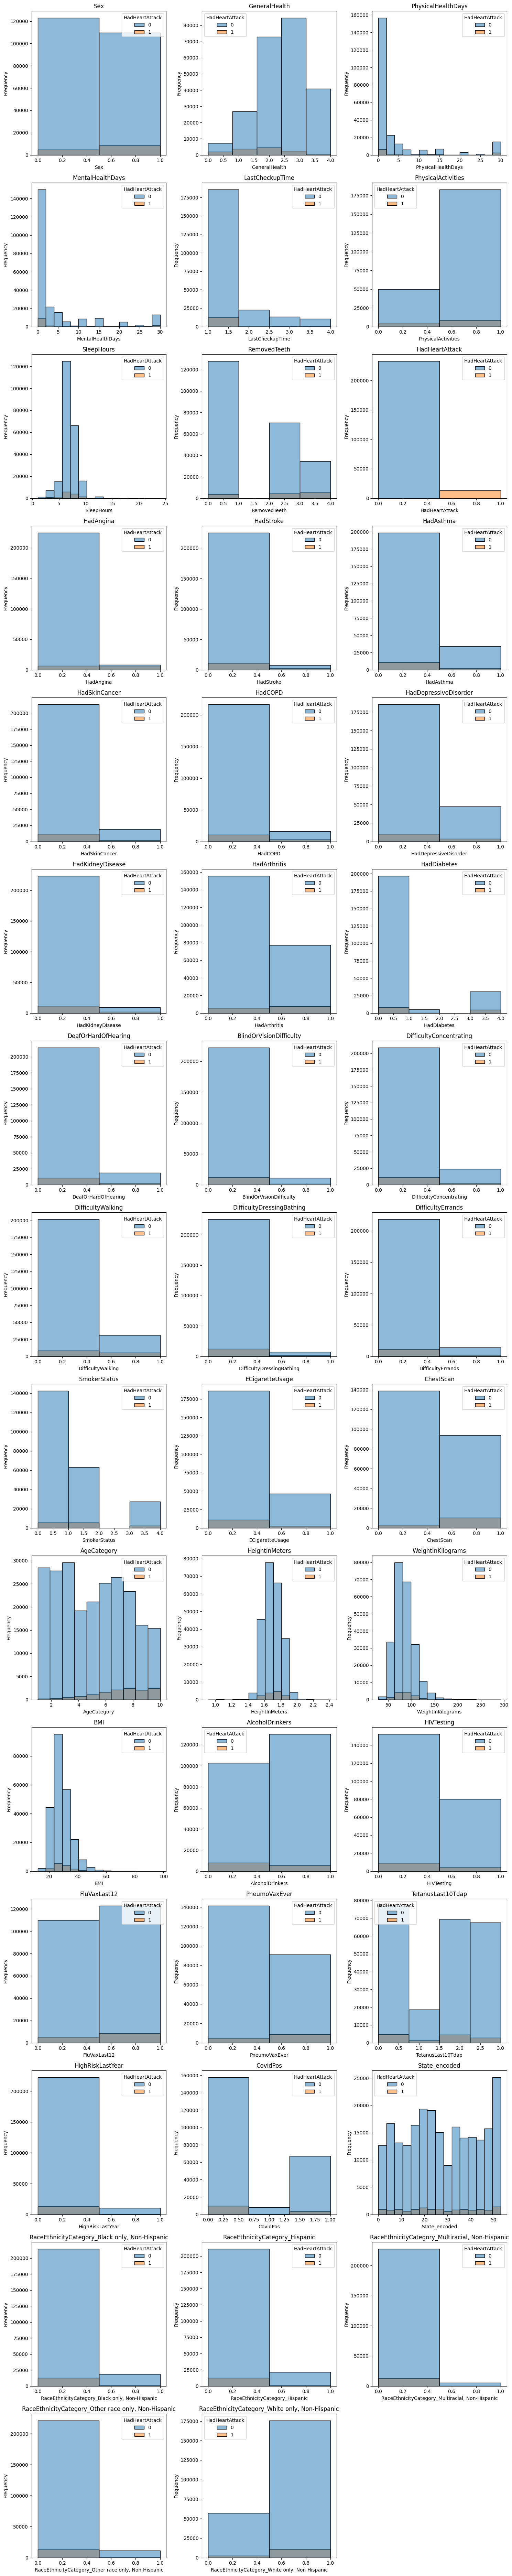

In [19]:
numerical_vars = data.select_dtypes(include='number').columns.tolist()
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create histograms
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    bins = min([len(data[variable].value_counts()),15])
    sns.histplot(data = data, x = variable, ax=ax, bins = bins, hue = "HadHeartAttack", hue_order = [0,1])
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

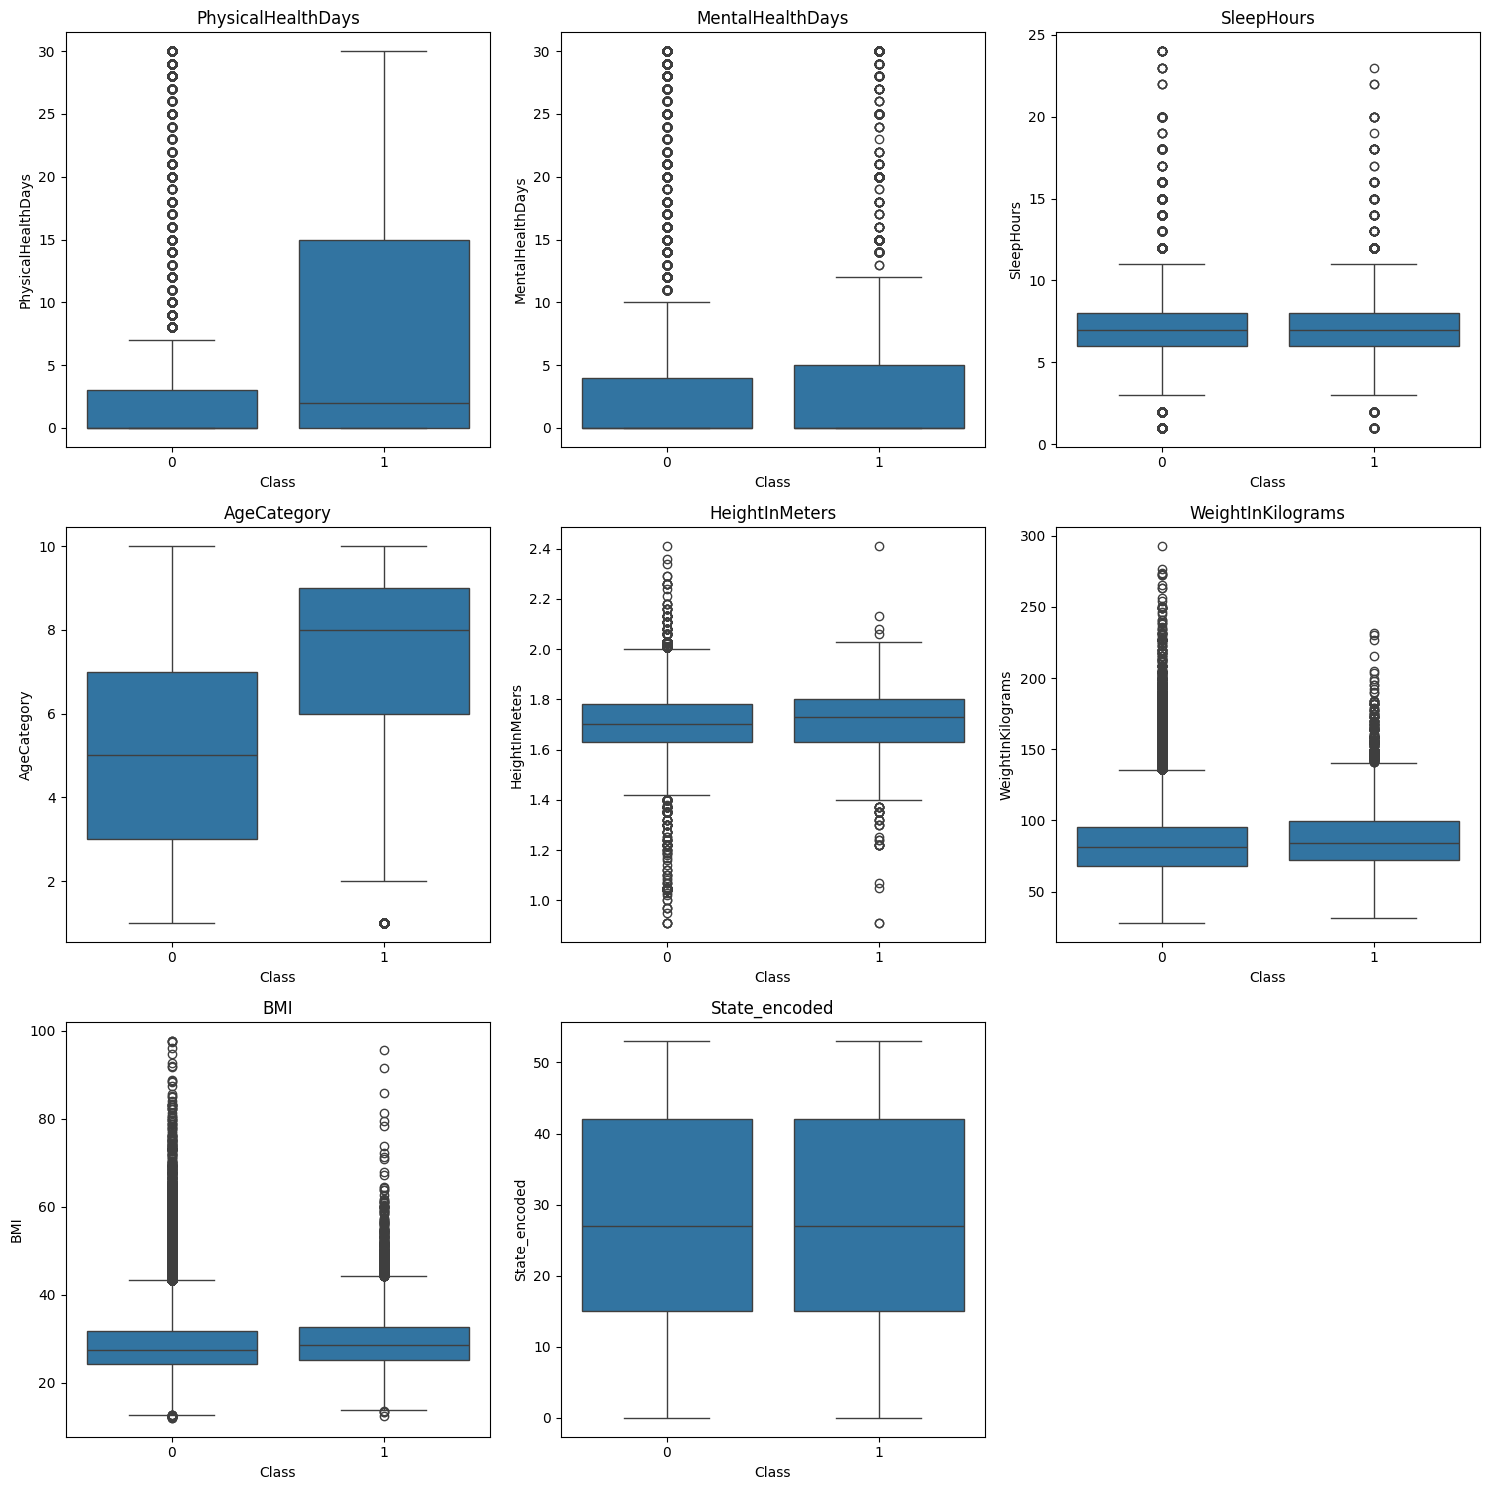

In [20]:
numerical_vars = [col for col in data.select_dtypes(include='number').columns if data[col].nunique() > 5]
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create boxplots
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.boxplot(data=data, x='HadHeartAttack', y=variable, ax=ax)  # Change to boxplot
    ax.set_title(variable)
    ax.set_xlabel('Class')
    ax.set_ylabel(variable)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
data.dtypes

Sex                                                      int64
GeneralHealth                                            int64
PhysicalHealthDays                                     float64
MentalHealthDays                                       float64
LastCheckupTime                                          int64
PhysicalActivities                                       int64
SleepHours                                             float64
RemovedTeeth                                             int64
HadHeartAttack                                           int64
HadAngina                                                int64
HadStroke                                                int64
HadAsthma                                                int64
HadSkinCancer                                            int64
HadCOPD                                                  int64
HadDepressiveDisorder                                    int64
HadKidneyDisease                                       

In [22]:
data.agg(['min', 'max'])

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,State_encoded,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic"
min,0,0,0.0,0.0,1,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
max,1,4,30.0,30.0,4,1,24.0,4,1,1,...,1,3,1,2,53,1,1,1,1,1


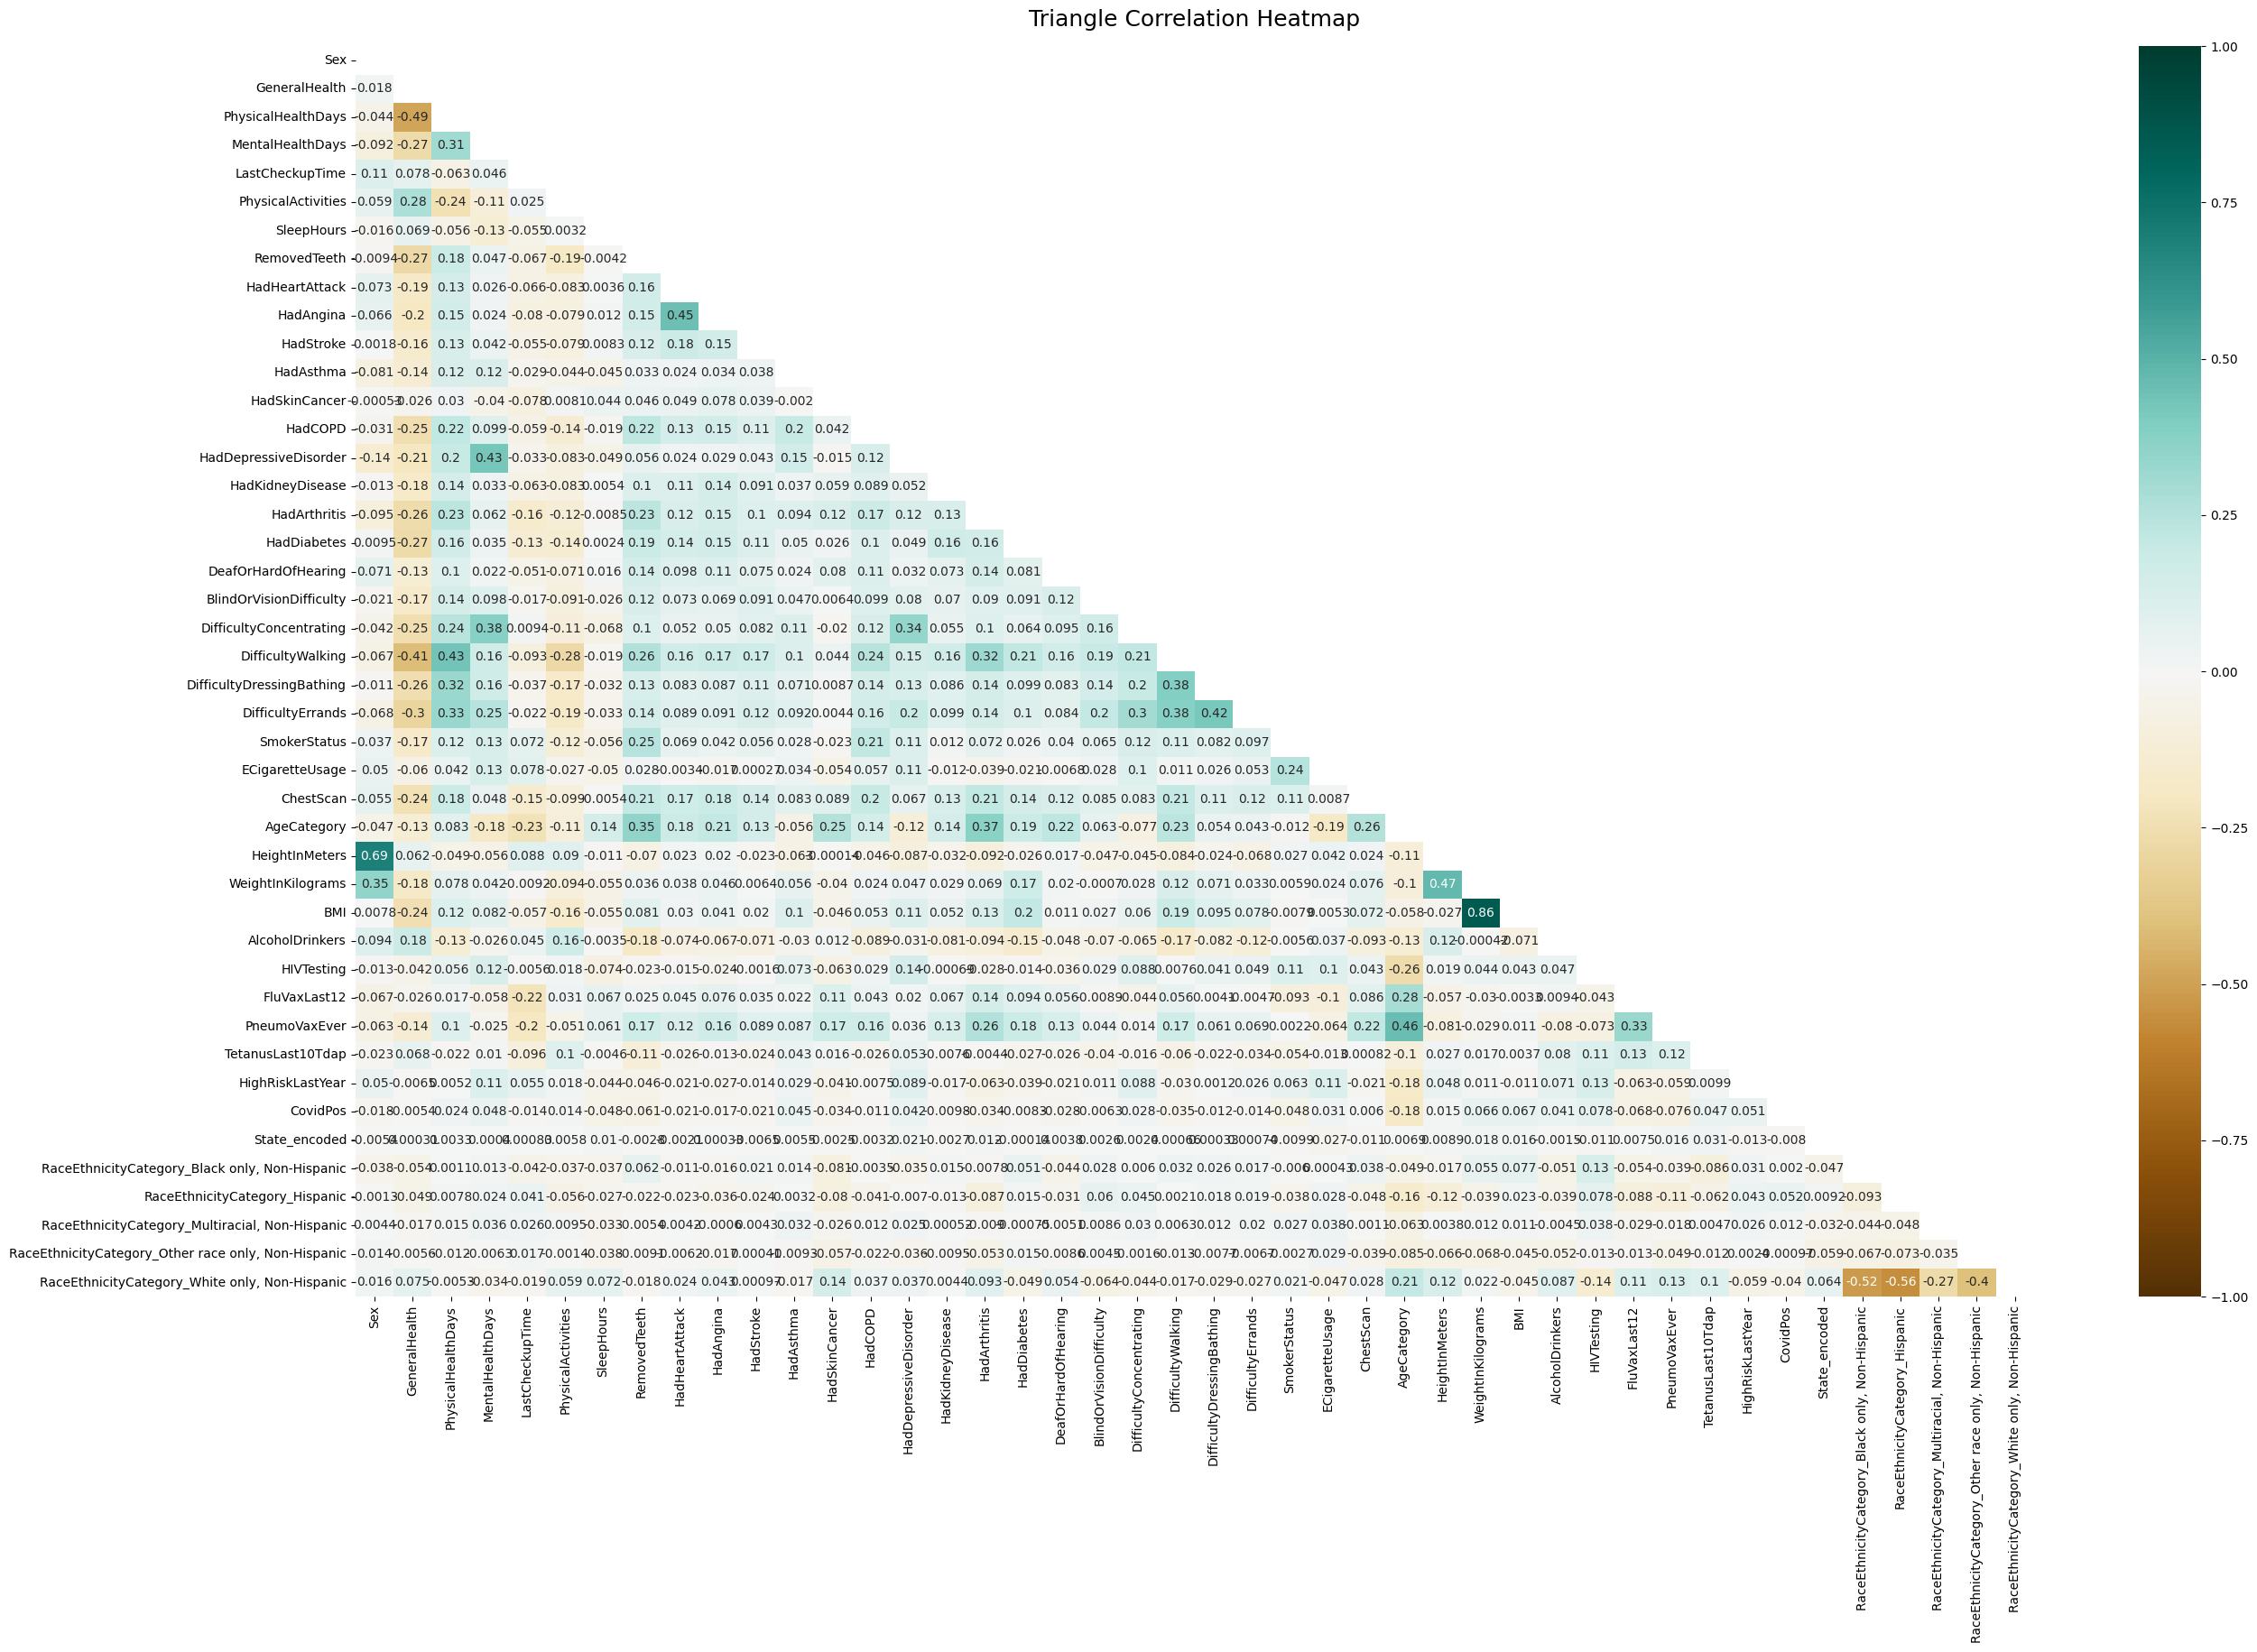

In [24]:
plt.figure(figsize=(30, 18))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()